In [1]:
import os
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
import numpy as np

## Empty labels

In [2]:
data_dir = Path.cwd().parents[1] / "oidv6_data_converted_11classes"

In [4]:
subset = "test"

for path in (data_dir / "labels" / subset).glob("*.txt"):
    # Remove unannotated images
    with open(path, "r") as infile:
        if not infile.read():
            print(path)

## Inspect bounding box

In [18]:
data_dir = Path.cwd().parents[1] / "oidv6_data_converted_11classes"
images_dir = data_dir / "images"
labels_dir = data_dir / "labels"
output_dir = data_dir / "label_data"
output_dir.mkdir(parents=True, exist_ok=True)

In [6]:
def has_insufficient_orange(image, boxes, threshold):
    h, w = image.shape[:-1]
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    imask = cv2.inRange(hsv, (5, 0, 0), (25, 255, 255)) > 0
    
    color_checks = []
    for box in boxes:
        x, y, width, height = map(int, box[1:])
        x = int(box[1] * w)
        y = int(box[2] * h)
        width = int(box[3] * w)
        height = int(box[4] * h)
        xmin = x - width // 2
        ymin = y - height // 2
        xmax = x + width // 2
        ymax = y + height // 2
        color_checks.append((imask[ymin:ymax, xmin:xmax].sum() / imask[ymin:ymax, xmin:xmax].size) < threshold)
    return all(color_checks)



In [24]:
subset = "test"

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
for path in (images_dir / subset).glob("orange*.jpg"):
    image = cv2.imread(str(path))
    h, w = image.shape[:-1]
    with open(labels_dir / subset / f"{path.stem}.txt", "r") as infile:
        boxes = [line.strip().split(" ") for line in infile.readlines()]
        for i, box in enumerate(boxes):
            boxes[i][1:] = map(float, box[1:])
    boxes = [box for box in boxes if box[0] == "2"]
    if boxes and has_insufficient_orange(image, boxes, 0.6):
        for box in boxes:
            x, y, width, height = map(int, box[1:])
            x = int(box[1] * w)
            y = int(box[2] * h)
            width = int(box[3] * w)
            height = int(box[4] * h)
            image = cv2.rectangle(image, (x - width // 2, y - height // 2), (x + width // 2, y + height // 2), colors[int(box[0])], 2)
        cv2.imwrite(str(output_dir / path.name), image)

In [25]:
for path in output_dir.glob("*.jpg"):
    image = cv2.imread(str(path))
    h, w = image.shape[:-1]
    with open(labels_dir / subset / f"{path.stem}.txt", "r") as infile:
        boxes = [line.strip().split(" ") for line in infile.readlines()]
        for i, box in enumerate(boxes):
            boxes[i][1:] = map(float, box[1:])
    for box in boxes:
        x, y, width, height = map(int, box[1:])
        x = int(box[1] * w)
        y = int(box[2] * h)
        width = int(box[3] * w)
        height = int(box[4] * h)
        image = cv2.rectangle(image, (x - width // 2, y - height // 2), (x + width // 2, y + height // 2), colors[int(box[0])], 2)
    cv2.imwrite(str(output_dir / path.name), image)

In [27]:
for path in output_dir.glob("*.jpg"):
    # print((images_dir / subset / path.name).exists())
    # print((labels_dir / subset / f"{path.stem}.txt").exists())

    os.remove(images_dir / subset / path.name)
    os.remove(labels_dir / subset / f"{path.stem}.txt")

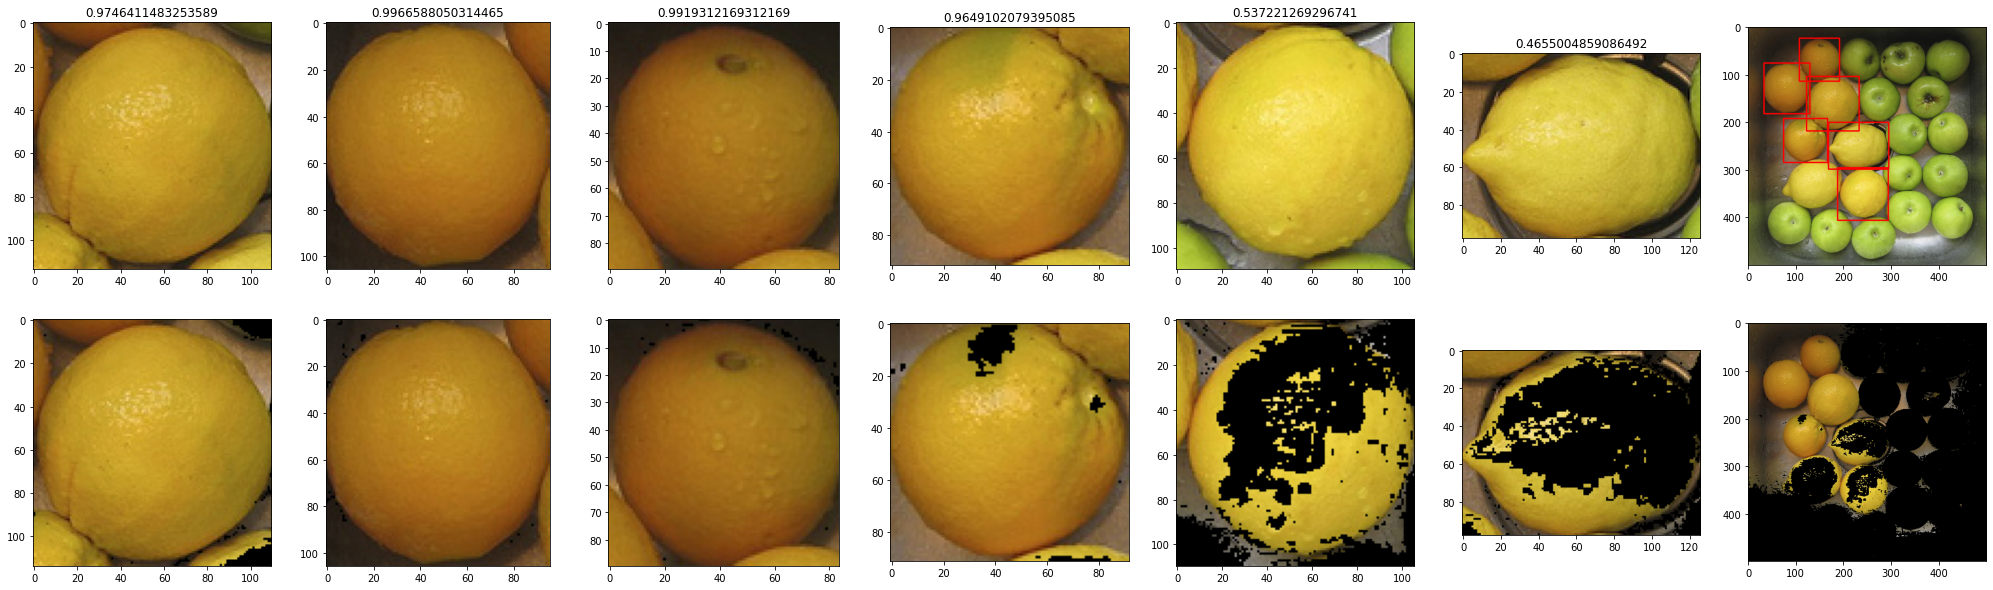

In [64]:
path = images_dir / subset / "000000056364.jpg"
# path = images_dir / subset / "000000018292.jpg"
image = cv2.imread(str(path))
h, w = image.shape[:-1]
image_copy = image.copy()
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (5, 0, 0), (25, 255, 255))
imask = mask > 0
orange = np.zeros_like(image, np.uint8)
orange[imask] = image[imask]
with open(labels_dir / subset / f"{path.stem}.txt", "r") as infile:
    boxes = [line.strip().split(" ") for line in infile.readlines()]
    for i, box in enumerate(boxes):
        boxes[i][1:] = map(float, box[1:])
boxes = [box for box in boxes if box[0] == "2"]
fig, ax = plt.subplots(2, len(boxes) + 1, figsize=(5 * len(boxes) + 5, 10))
for i, box in enumerate(boxes):
    x, y, width, height = map(int, box[1:])
    x = int(box[1] * w)
    y = int(box[2] * h)
    width = int(box[3] * w)
    height = int(box[4] * h)
    xmin = x - width // 2
    ymin = y - height // 2
    xmax = x + width // 2
    ymax = y + height // 2
    proportion = imask[ymin:ymax, xmin:xmax].sum() / imask[ymin:ymax, xmin:xmax].size
    ax[0][i].imshow(image[ymin : ymax, xmin : xmax, ::-1])
    ax[0][i].set_title(proportion)
    ax[1][i].imshow(orange[ymin : ymax, xmin : xmax, ::-1])
    image_copy = cv2.rectangle(image_copy, (xmin, ymin), (xmax, ymax), colors[int(box[0])], 2)
ax[0][len(boxes)].imshow(image_copy[:, :, ::-1])
ax[1][len(boxes)].imshow(orange[:, :, ::-1])

# histogram, bin_edges = np.histogram(hsv[:, :, 0], bins=180, range=(0, 180))

# fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# ax[0].plot(bin_edges[:-1], histogram)
# ax[1].imshow(image[:, :, ::-1])
# ax[2].imshow(orange[:, :, ::-1])

In [66]:
has_insufficient_orange(image, boxes, 0.6)

True

In [15]:
folder = Path(r"C:\Users\Admin\Downloads\task_label orange_rejects 1-2021_06_11_08_15_32-yolo 1.1\obj_train_data")
to_remove = []
for path in folder.glob("*.txt"):
    with open(path, "r") as infile:
        if not infile.read():
            to_remove.append(path)

In [17]:
for path in to_remove:
    os.remove(path)
    os.remove(path.with_suffix(".jpg"))